<a href="https://colab.research.google.com/github/tjp1992/ML-Jupyter/blob/main/Tools/Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Useful Functions

The following notebook contains codes and packages that I have found useful whether it be EDA or Optimization of Models.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

- [sweetviz](https://pypi.org/project/sweetviz/) (**Package**)
- [pandas_profiling](https://pypi.org/project/pandas-profiling/) (**Package**/ Commonly Used)

In [5]:
%pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.2 MB/s 


In [6]:
# Sweetviz Application on Iris Dataset from sklearn

import sweetviz as sv
from sklearn import datasets

iris = datasets.load_iris()

full_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
full_data['target']= iris['target']
# y = iris['target']

                                             |          | [  0%]   00:00 -> (? left)


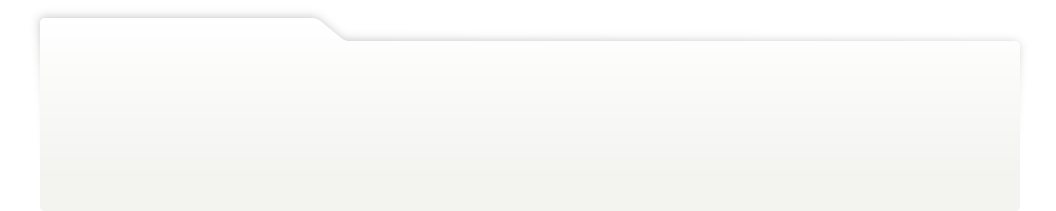
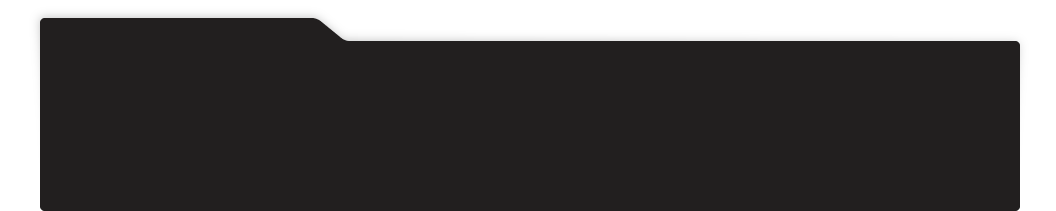
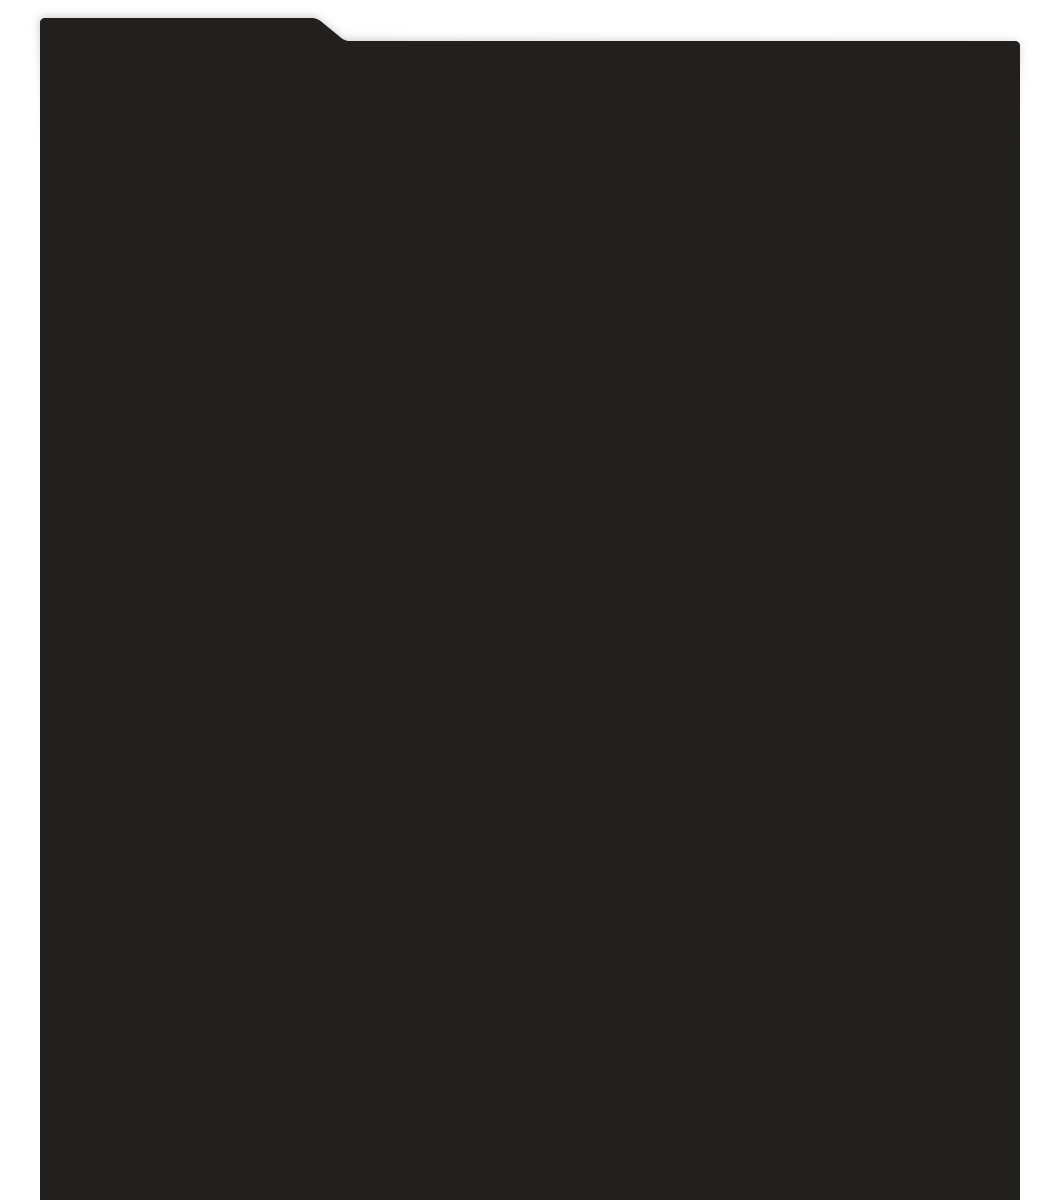
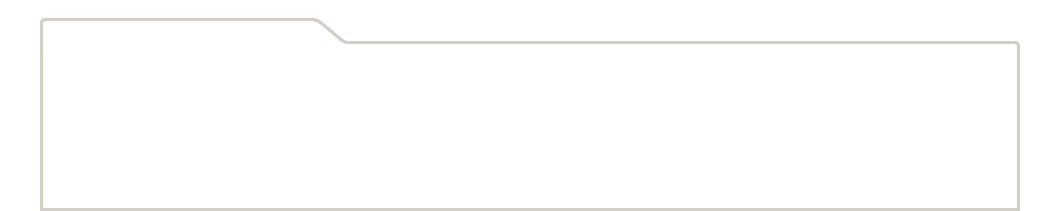
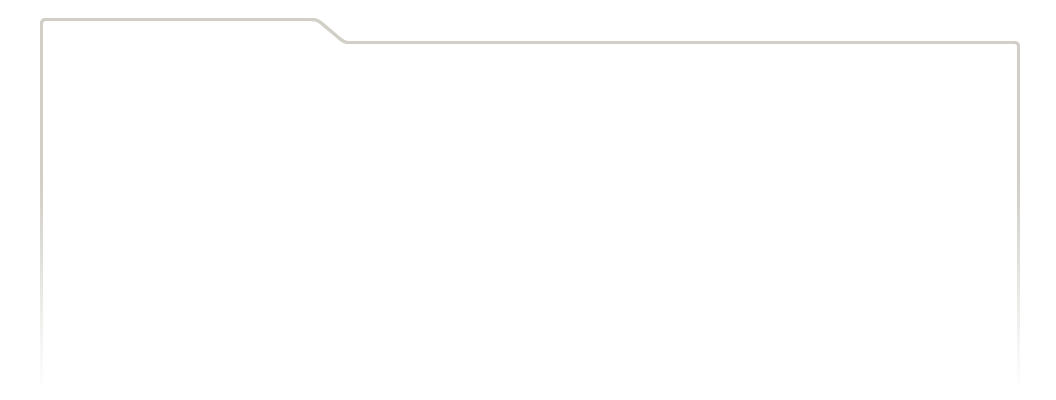
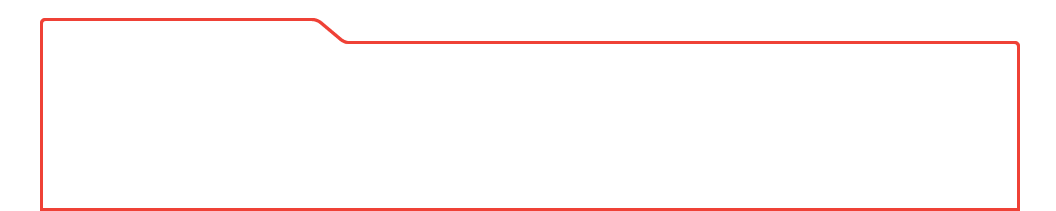
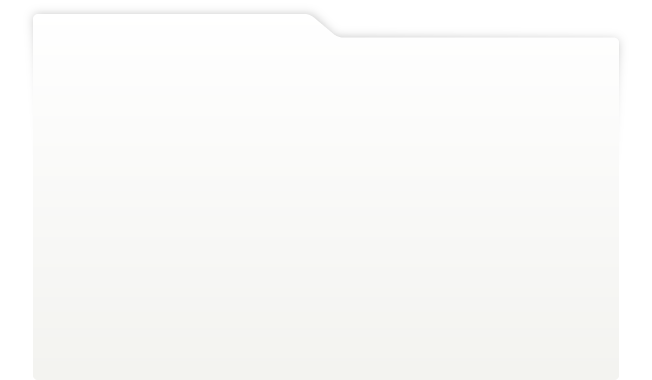
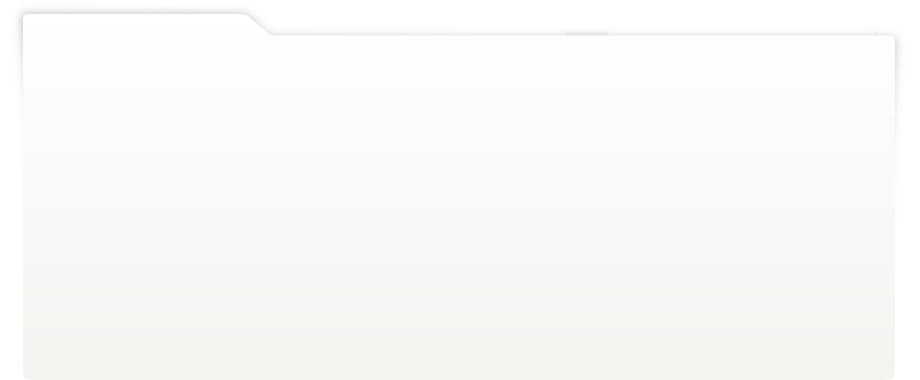
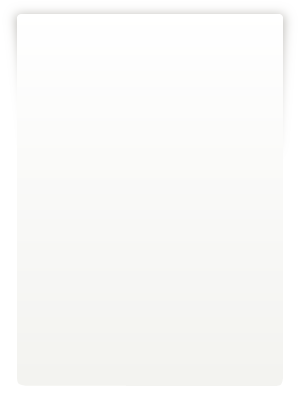
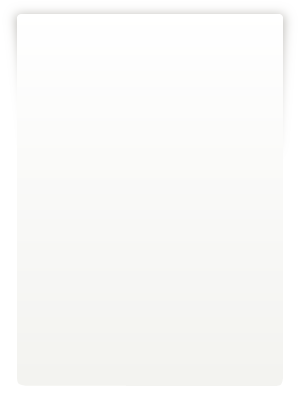
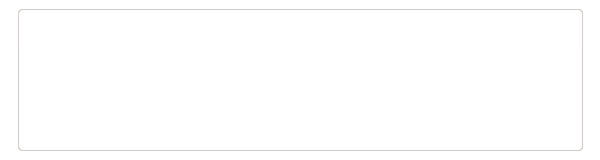
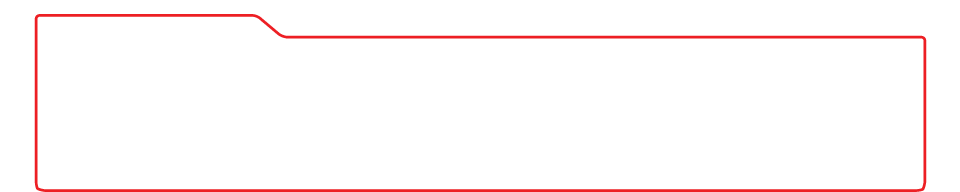
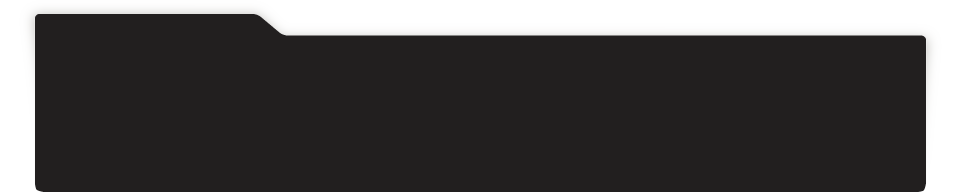
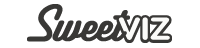
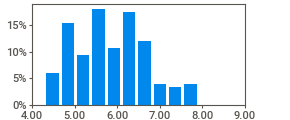
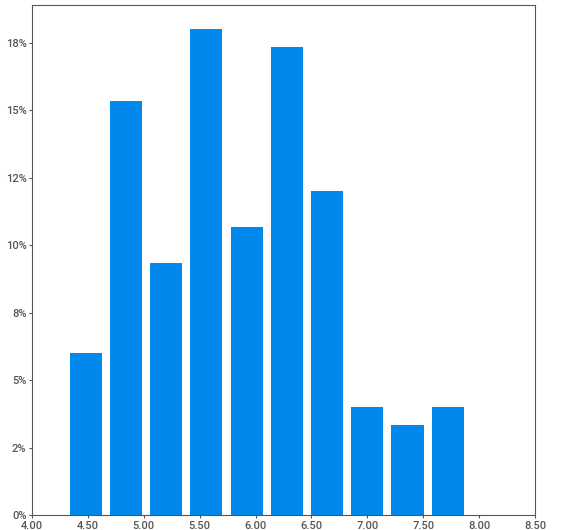
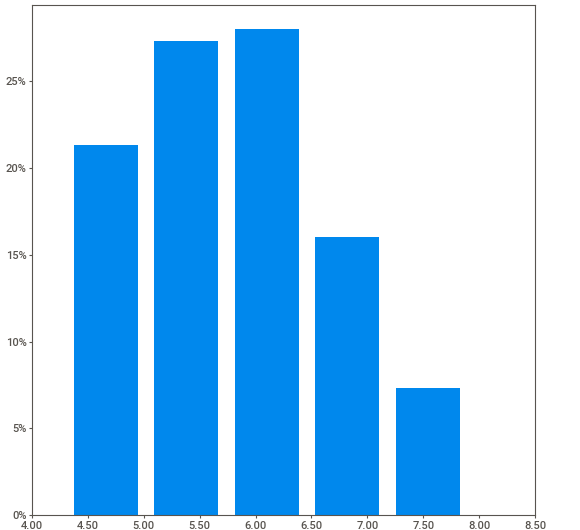
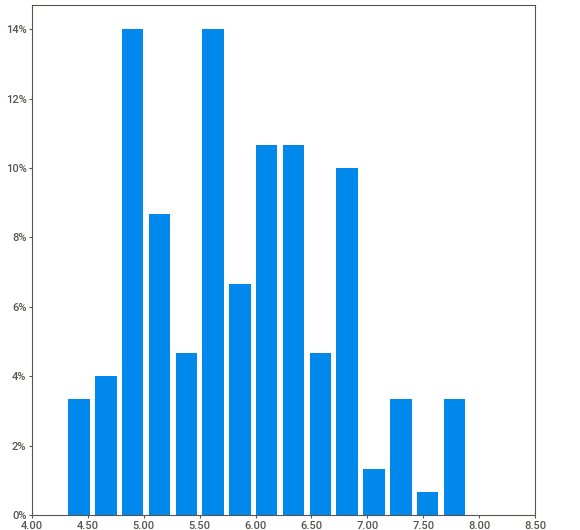
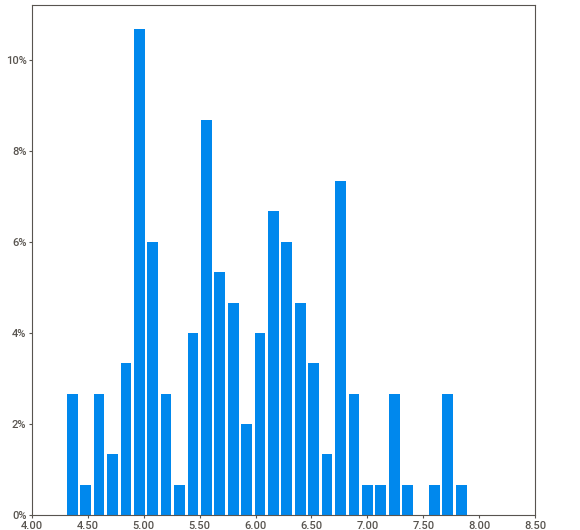
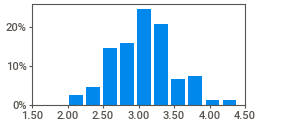
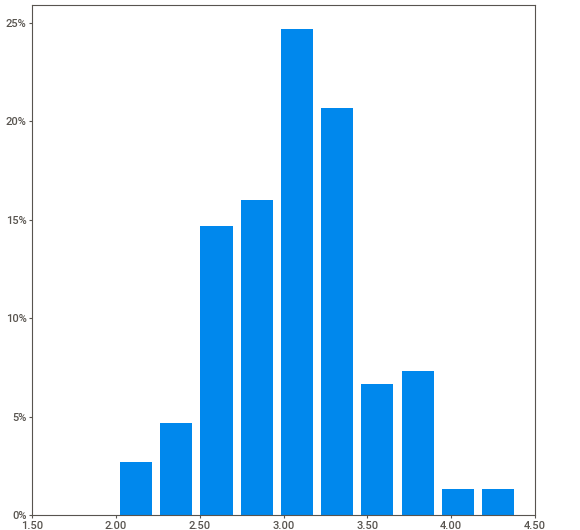
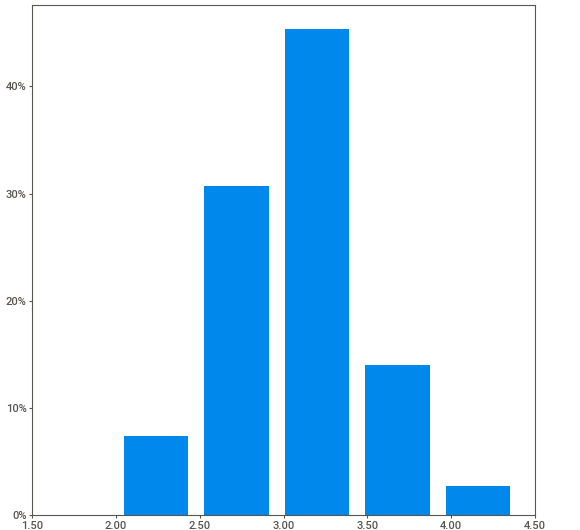
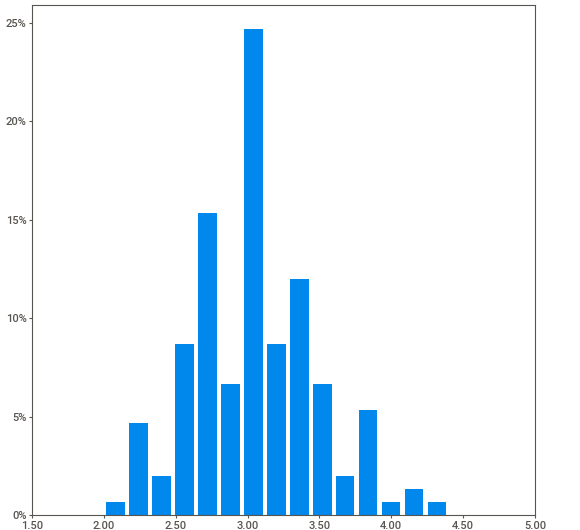
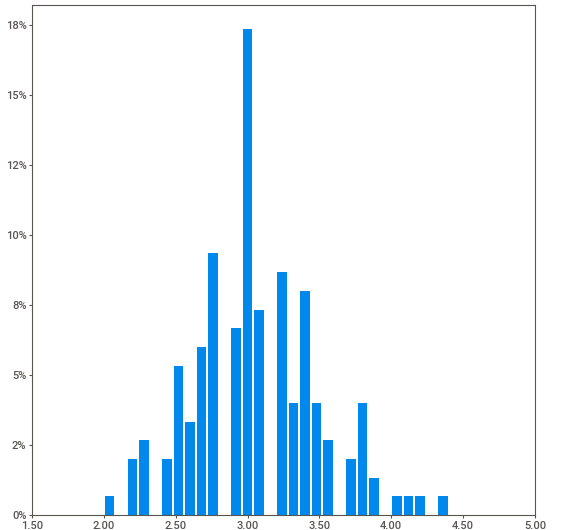
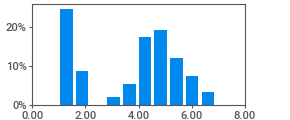
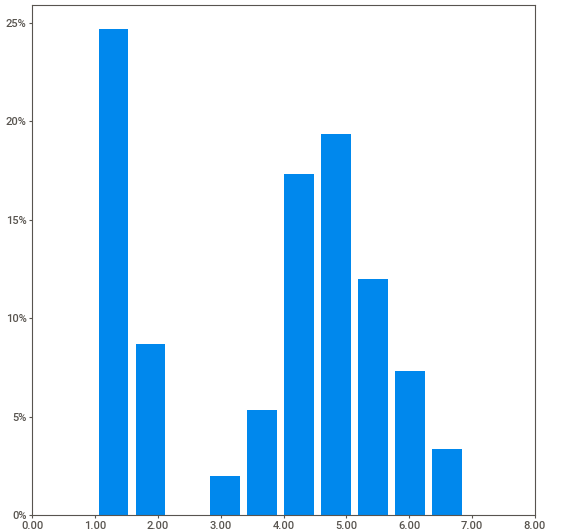
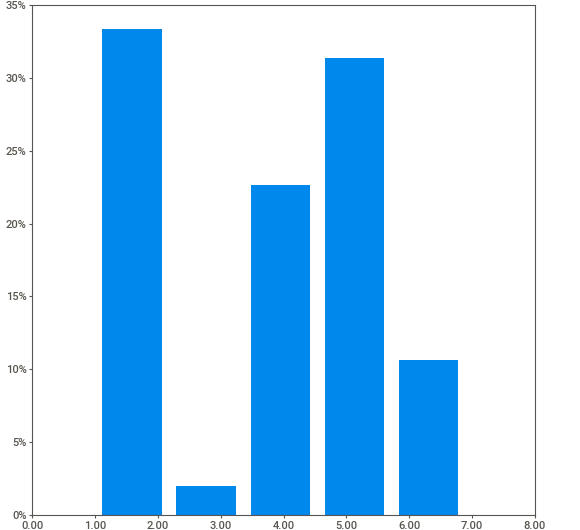
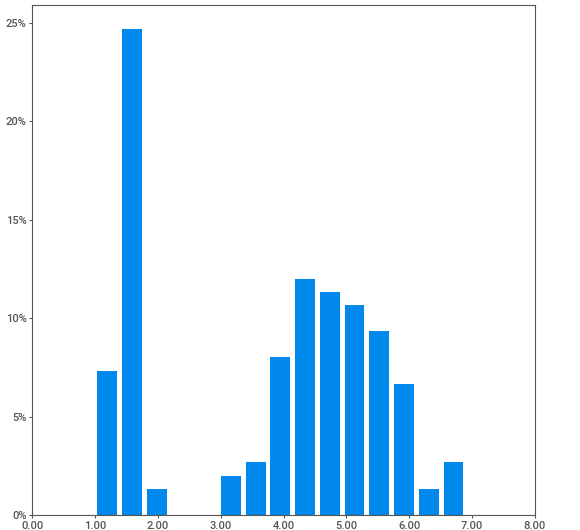
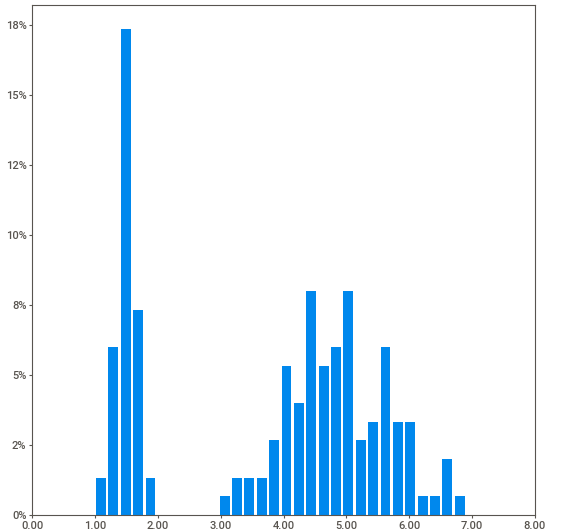
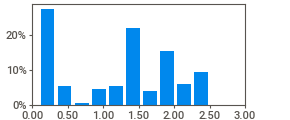
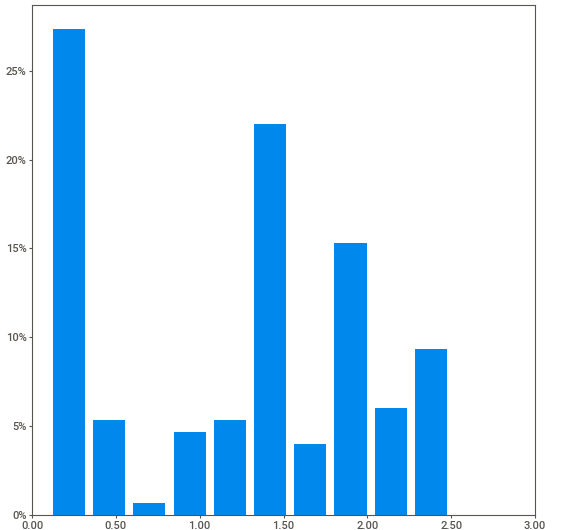
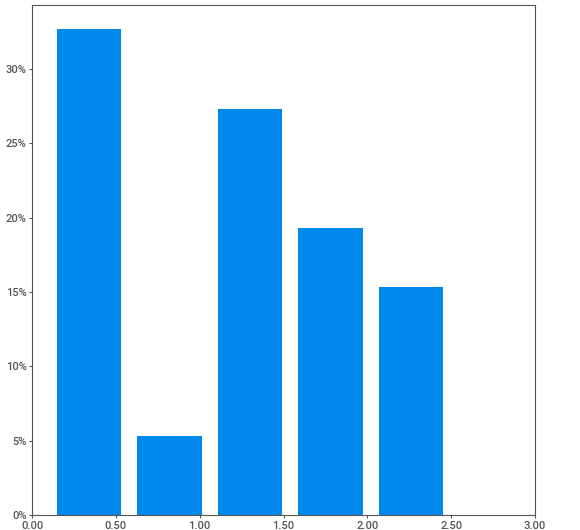
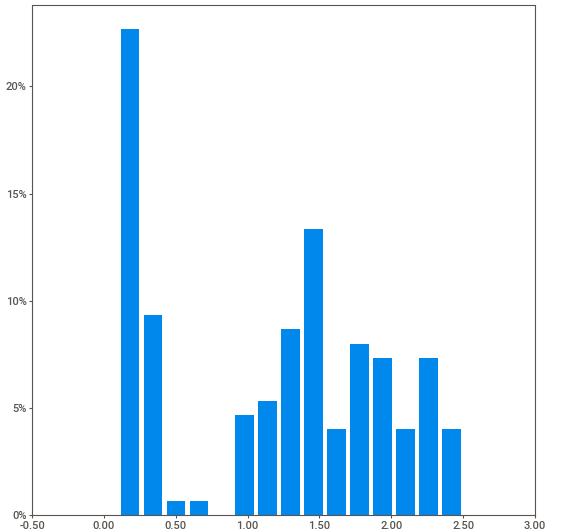
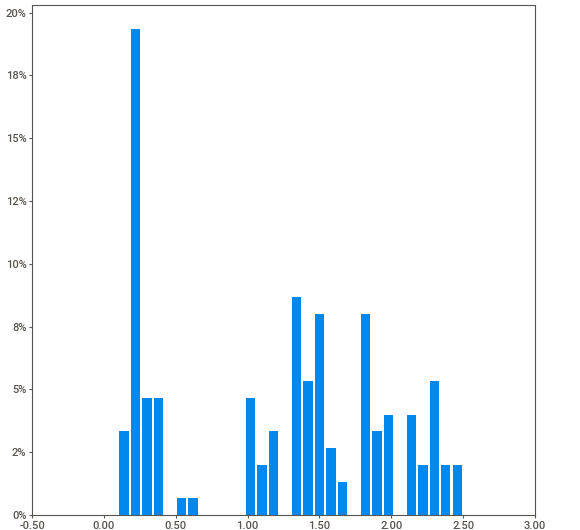
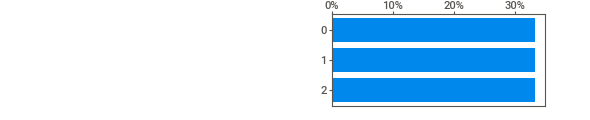
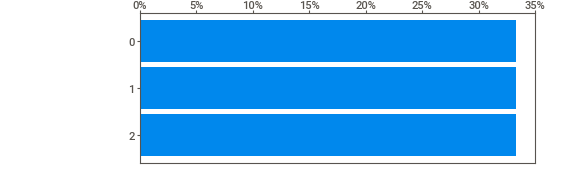
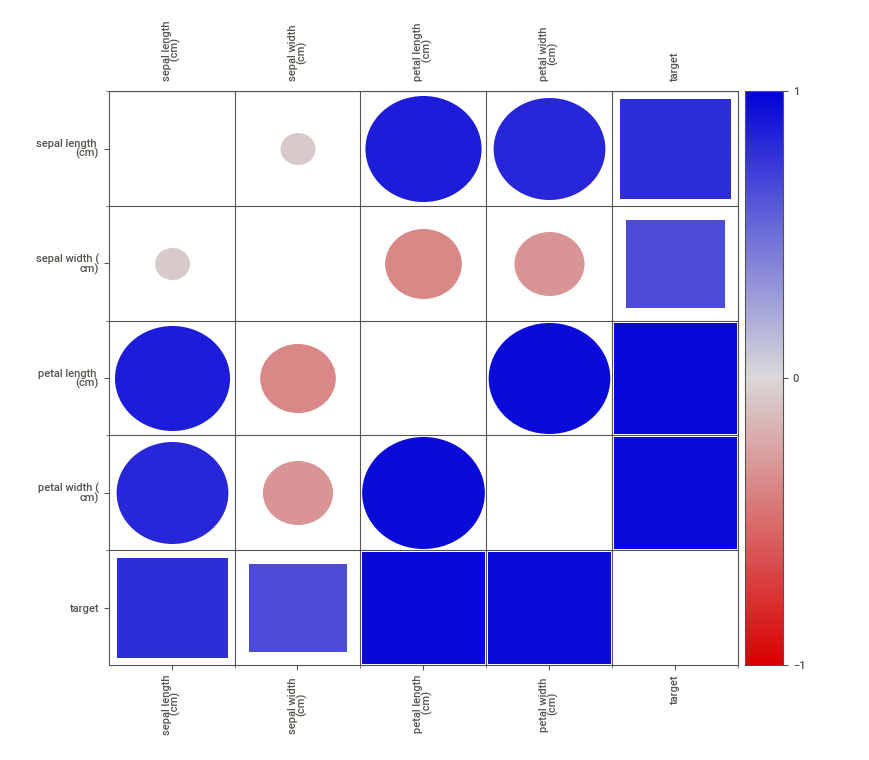
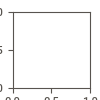

In [7]:
report = sv.analyze(full_data) 
report.show_notebook()

## Preprocessing (Python)

- [Memory Reduction](https://www.kaggle.com/code/arjanso/reducing-dataframe-memory-size-by-65/notebook)

In [9]:
# Memory Reduction Function

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

# Preprocessing With Pytorch

- [kuma-utils](https://github.com/analokmaus/kuma_utils)



## Model Optimization

Following function contains function for optimizing models